Drug analysis
==

### *# Import modules*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### *# Read csv file*

In [3]:
data = pd.read_csv('data/drug.csv', na_values='?')

print(type(data))

<class 'pandas.core.frame.DataFrame'>


Data Undestanding - Data exploratory analysis
--

### *# Data dimensions (n_rows x n_columns)

In [5]:
print(data.shape)

(200, 9)


### *# Shape is a tuple object*

In [6]:
print(type(data.shape))

<class 'tuple'>


### *# List the attributes*

In [8]:
attributes = list(data.columns)
print(attributes)

['Instance_number', 'ID', 'Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug']


### *# Print the data*

In [9]:
print(data)

     Instance_number   ID  Age Sex      BP Cholesterol        Na         K  \
0                  0    1   23   F    HIGH        HIGH  0.792535  0.031258   
1                  1    2   47   M     LOW        HIGH  0.739309  0.056468   
2                  2    3   47   M     LOW        HIGH  0.697269  0.068944   
3                  3    4   28   F  NORMAL        HIGH  0.563682  0.072289   
4                  4    5   61   F     LOW        HIGH  0.559294  0.030998   
5                  5    6   22   F  NORMAL        HIGH       NaN  0.078647   
6                  6    7   49   F  NORMAL        HIGH  0.789637  0.048518   
7                  7    8   41   M     LOW        HIGH  0.766635  0.069461   
8                  8    9   60   M  NORMAL        HIGH  0.777205  0.051230   
9                  9   10   43   M     LOW      NORMAL  0.526102  0.027164   
10                10   11   47   F     LOW        HIGH  0.896056  0.076147   
11                11   12   34   F    HIGH      NORMAL  0.667775

### *# Print only the first 10 records*

In [10]:
print(data.head(10))

   Instance_number  ID  Age Sex      BP Cholesterol        Na         K   Drug
0                0   1   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1                1   2   47   M     LOW        HIGH  0.739309  0.056468  drugC
2                2   3   47   M     LOW        HIGH  0.697269  0.068944  drugC
3                3   4   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4                4   5   61   F     LOW        HIGH  0.559294  0.030998  drugY
5                5   6   22   F  NORMAL        HIGH       NaN  0.078647  drugX
6                6   7   49   F  NORMAL        HIGH  0.789637  0.048518  drugY
7                7   8   41   M     LOW        HIGH  0.766635  0.069461  drugC
8                8   9   60   M  NORMAL        HIGH  0.777205  0.051230  drugY
9                9  10   43   M     LOW      NORMAL  0.526102  0.027164  drugY


### *# Get attribute types*

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
Instance_number    200 non-null int64
ID                 200 non-null int64
Age                200 non-null int64
Sex                200 non-null category
BP                 200 non-null category
Cholesterol        200 non-null category
Na                 194 non-null float64
K                  196 non-null float64
Drug               200 non-null category
dtypes: category(4), float64(2), int64(3)
memory usage: 9.2 KB
None


### *# Convert wrong attribute types*

| Pandas dtype  	| Python type 	| NumPy type                                                     	| Usage                             	|
|---------------	|-------------	|----------------------------------------------------------------	|-----------------------------------	|
| object        	| str         	| string_, unicode_                                              	| Text                              	|
| int64         	| int         	| int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 	| Integer numbers                   	|
| float64       	| float       	| float_, float16, float32, float64                              	| Floating point numbers            	|
| bool          	| bool        	| bool_                                                          	| True/False values                 	|
| datetime64    	| NA          	| datetime64[ns]                                                 	| Date and time values              	|
| timedelta[ns] 	| NA          	| NA                                                             	| Differences between two datetimes 	|
| category      	| NA          	| NA                                                             	| Finite list of text values        	|

In [13]:
data['Sex'] = data['Sex'].astype('category')
data['BP'] = data['BP'].astype('category')
data['Cholesterol'] = data['Cholesterol'].astype('category')
data['Drug'] = data['Drug'].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
Instance_number    200 non-null int64
ID                 200 non-null int64
Age                200 non-null int64
Sex                200 non-null category
BP                 200 non-null category
Cholesterol        200 non-null category
Na                 194 non-null float64
K                  196 non-null float64
Drug               200 non-null category
dtypes: category(4), float64(2), int64(3)
memory usage: 9.2 KB
None


### *# Get general statistics*

In [14]:
print(data.describe(include='all'))

        Instance_number          ID         Age  Sex    BP Cholesterol  \
count        200.000000  200.000000  200.000000  200   200         200   
unique              NaN         NaN         NaN    2     3           2   
top                 NaN         NaN         NaN    M  HIGH        HIGH   
freq                NaN         NaN         NaN  104    77         103   
mean          99.500000  100.500000   44.315000  NaN   NaN         NaN   
std           57.879185   57.879185   16.544315  NaN   NaN         NaN   
min            0.000000    1.000000   15.000000  NaN   NaN         NaN   
25%           49.750000   50.750000   31.000000  NaN   NaN         NaN   
50%           99.500000  100.500000   45.000000  NaN   NaN         NaN   
75%          149.250000  150.250000   58.000000  NaN   NaN         NaN   
max          199.000000  200.000000   74.000000  NaN   NaN         NaN   

                Na           K   Drug  
count   194.000000  196.000000    200  
unique         NaN         NaN 

### *# Building histograms*

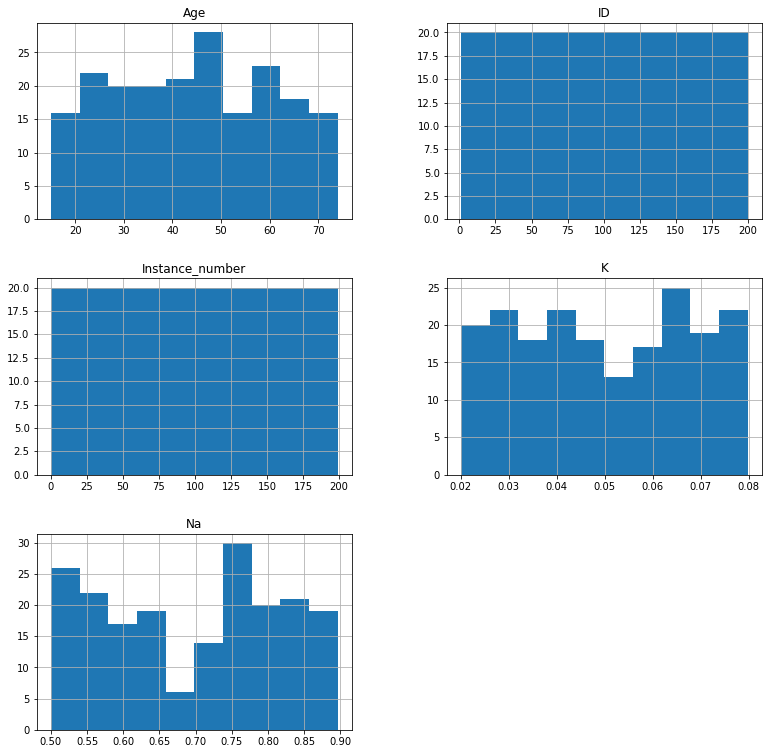

In [15]:
data.hist(figsize=(13, 13))
plt.show()

### *# Bar plots for categorical attributes*

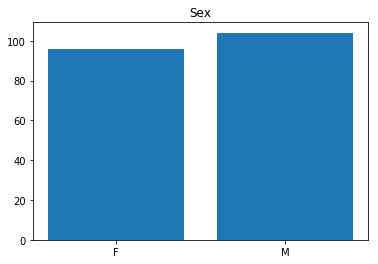

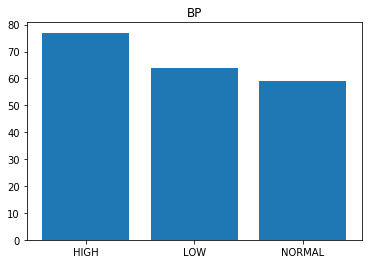

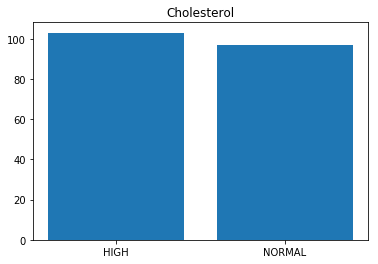

In [17]:
groups = dict(data.groupby('Sex').size())
plt.bar(groups.keys(), groups.values(), align='center')
plt.title('Sex')
plt.show()

groups = dict(data.groupby('BP').size())
plt.bar(groups.keys(), groups.values(), align='center')
plt.title('BP')
plt.show()

groups = dict(data.groupby('Cholesterol').size())
plt.bar(groups.keys(), groups.values(), align='center')
plt.title('Cholesterol')
plt.show()

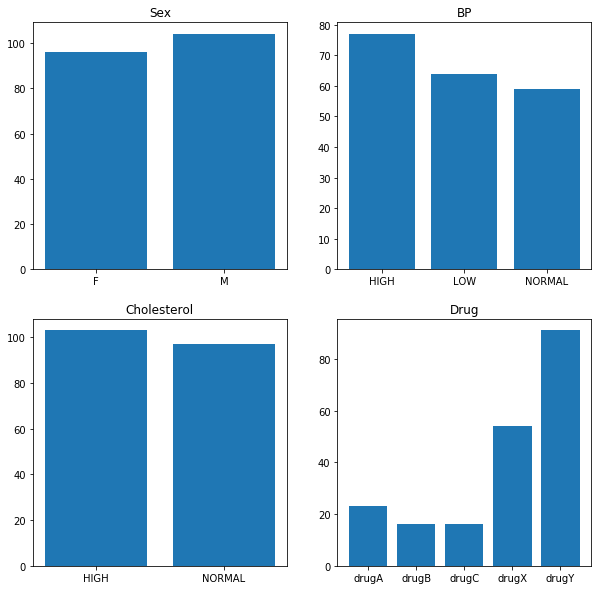

In [18]:
# subplot(nrow, ncols)
plt.subplots(2, 2, figsize=(10, 10))

# subplot(nrow, ncols, index)
plt.subplot(2, 2, 1)
groups = dict(data.groupby('Sex').size())
plt.bar(groups.keys(), groups.values(), align='center')
plt.title('Sex')

plt.subplot(2, 2, 2)
groups = dict(data.groupby('BP').size())
plt.bar(groups.keys(), groups.values(), align='center')
plt.title('BP')

plt.subplot(2, 2, 3)
groups = dict(data.groupby('Cholesterol').size())
plt.bar(groups.keys(), groups.values(), align='center')
plt.title('Cholesterol')

plt.subplot(2, 2, 4)
class_values = dict(data.groupby('Drug').size())
plt.bar(class_values.keys(), class_values.values(), align='center')
plt.title('Drug')

plt.show()

### *# Class distribution*

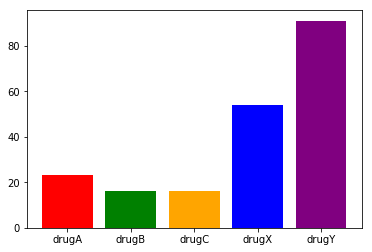

In [21]:
i = 0
colors = ['red', 'green', 'orange', 'blue', 'purple']
class_map = dict()
color_map = dict()


for class_value in class_values:
    color_map[class_value] = colors[i]
    class_map[class_value] = i
    i += 1

plt.bar(class_values.keys(), class_values.values(), align='center', color=color_map.values())
plt.show()

### *# Color  bar plots and histograms according to the class colors*

In [51]:
def colored_bar(data, class_map, color_map, attr_name, class_name):
    width = 0.3
    n_cols = len(data[attr_name].unique())
    p = []

    for gr in data.groupby(attr_name):
        y_offset = np.zeros(n_cols)
        attr_val = gr[0]
        class_vals = dict(gr[1].groupby(class_name).size())

        for class_val in class_vals:
            p.append(plt.bar(attr_val, class_vals[class_val], width,
                             color=color_map[class_val], bottom=y_offset, align='center'))
            y_offset = y_offset + class_vals[class_val]

    plt.title(attr_name)
    plt.ylabel('#count')
    plt.legend(p, class_map.keys())

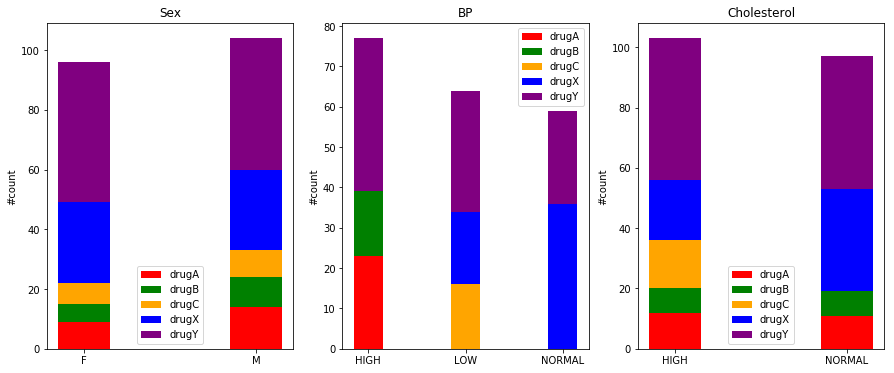

In [52]:
plt.subplots(1, 3, figsize=(15, 6))

plt.subplot(1, 3, 1)
colored_bar(data, class_map, color_map, 'Sex', 'Drug')

plt.subplot(1, 3, 2)
colored_bar(data, class_map, color_map, 'BP', 'Drug')

plt.subplot(1, 3, 3)
colored_bar(data, class_map, color_map, 'Cholesterol', 'Drug')

plt.show()

In [55]:
def colored_hist(data, class_map, color_map, attr_name, class_name, n_bins=10):
    plot_data = []
    
    for class_val in class_map:
        plot_data.append(data[data[class_name] == class_val][attr_name].values)

    plt.hist(plot_data, n_bins, histtype='bar', stacked=True, color=color_map.values())

    plt.title(attr_name)
    plt.ylabel('#count')
    plt.legend(class_map.keys())

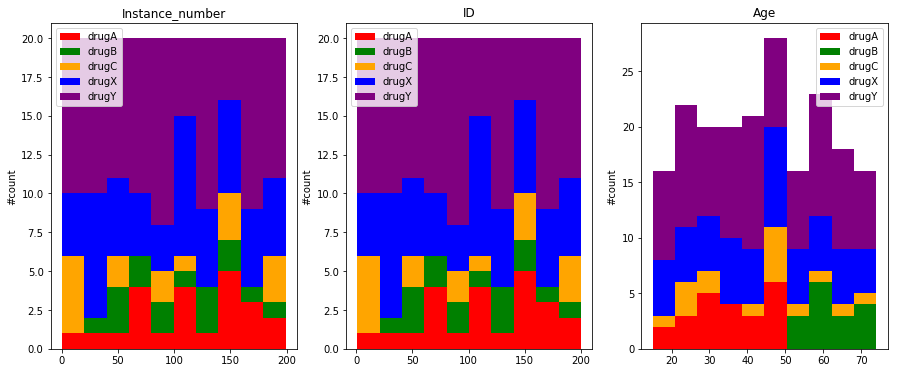

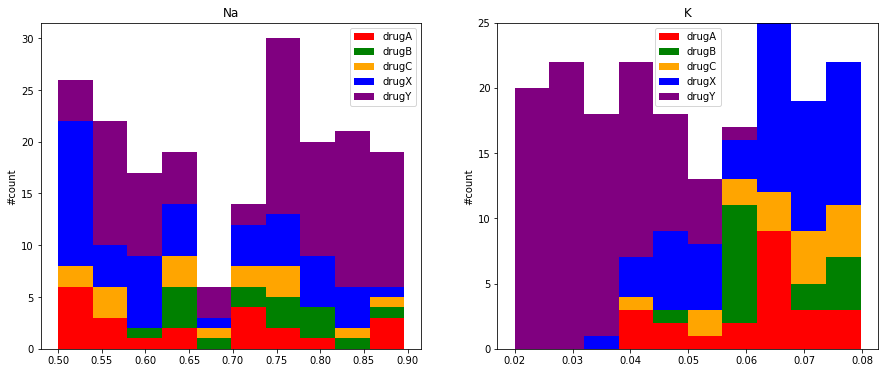

In [56]:
plt.subplots(1, 3, figsize=(15, 6))

plt.subplot(1, 3, 1)
colored_hist(data, class_map, color_map, 'Instance_number', 'Drug', n_bins=10)

plt.subplot(1, 3, 2)
colored_hist(data, class_map, color_map, 'ID', 'Drug', n_bins=10)

plt.subplot(1, 3, 3)
colored_hist(data, class_map, color_map, 'Age', 'Drug', n_bins=10)

plt.show()

plt.subplots(1, 2, figsize=(15, 6))

plt.subplot(1, 2, 1)
colored_hist(data, class_map, color_map, 'Na', 'Drug', n_bins=10)

plt.subplot(1, 2, 2)
colored_hist(data, class_map, color_map, 'K', 'Drug', n_bins=10)

plt.show()

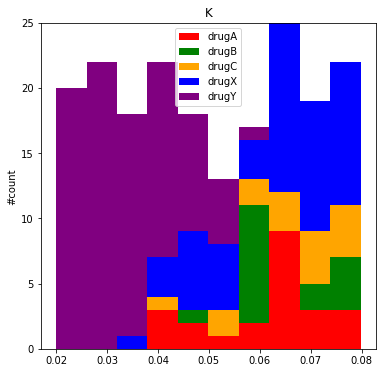

In [35]:
plt.figure(figsize=(6, 6))
colored_hist(data, class_map, color_map, 'K', 'Drug', n_bins=10)
plt.show()

### *# box and whisker plots (numerical attributes)*

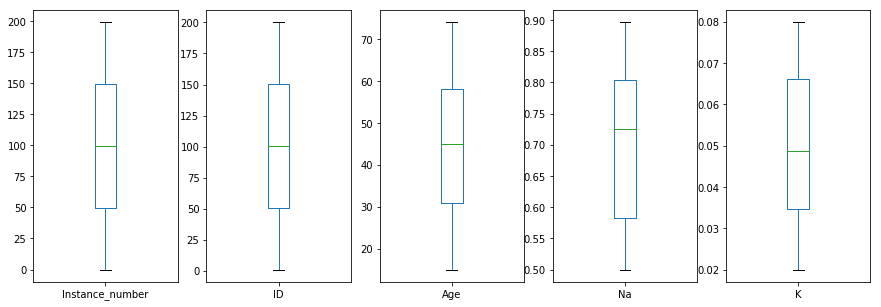

In [36]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 5))
plt.show()

No outliers...

### *# Scatter plot matrix (numerical attributes)*

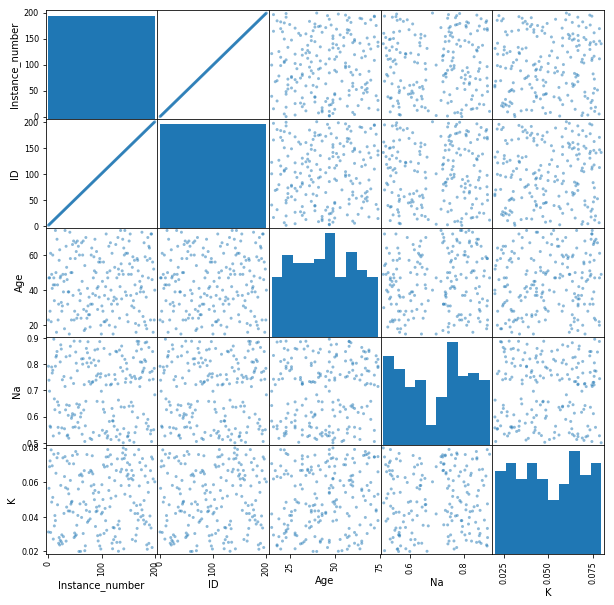

In [37]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

In [57]:
def colored_scatter(data, attr_name_x, attr_name_y, colors):
    plt.scatter(data[attr_name_x], data[attr_name_y], color=colors, s=60, marker='x')
    plt.xlabel(attr_name_x)
    plt.ylabel(attr_name_y)

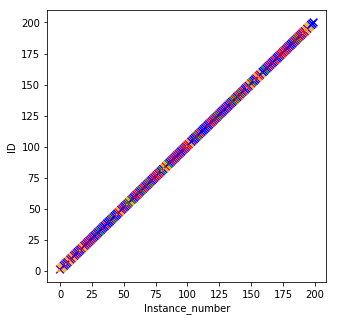

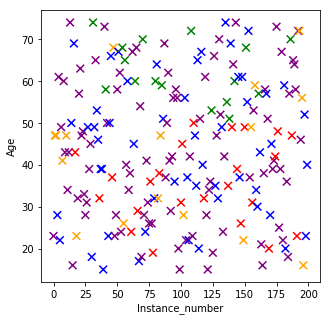

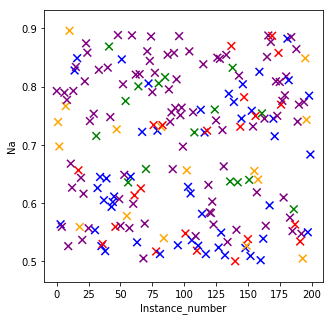

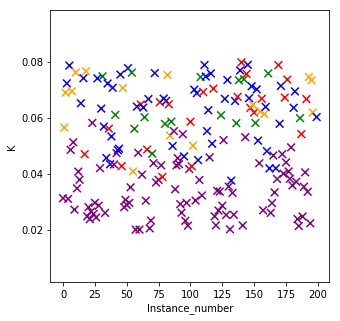

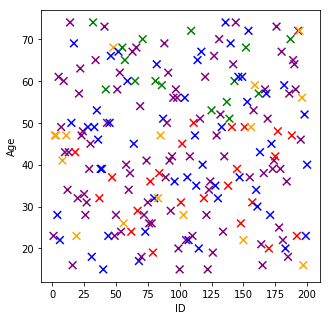

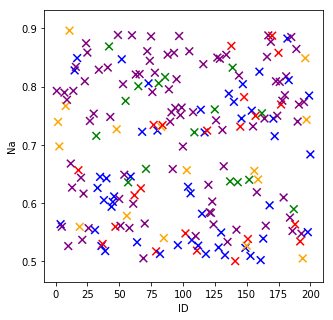

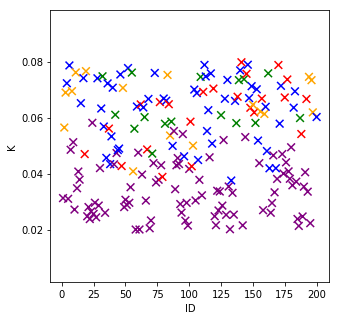

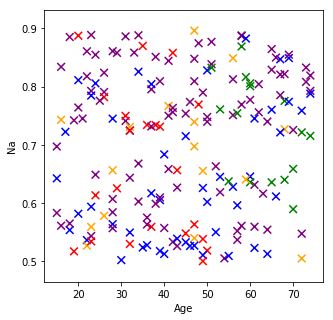

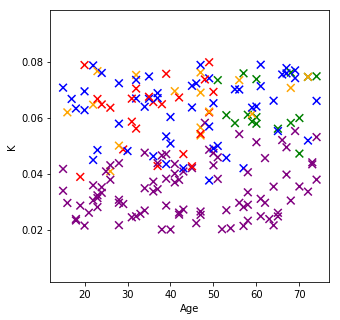

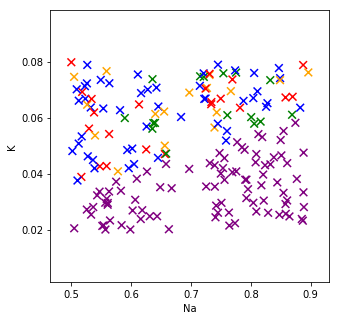

In [58]:
colors = data['Drug'].apply(lambda class_val: color_map[class_val])

numeric_attributes = list(data.select_dtypes(include=['float64', 'int64']).columns)
n_numeric_attributes = len(numeric_attributes)

for i in range(n_numeric_attributes):
    for j in range(i + 1, n_numeric_attributes):
        plt.figure(figsize=(5, 5))
        colored_scatter(data, numeric_attributes[i], numeric_attributes[j], colors)
        plt.show()

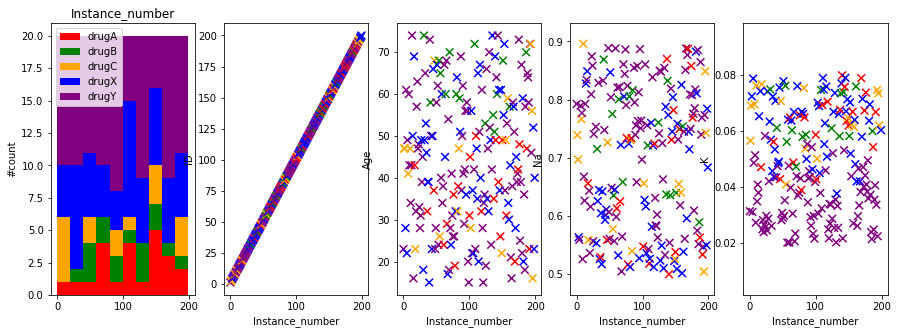

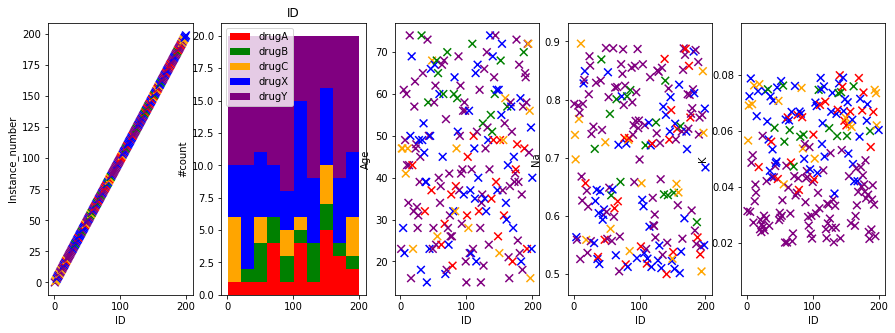

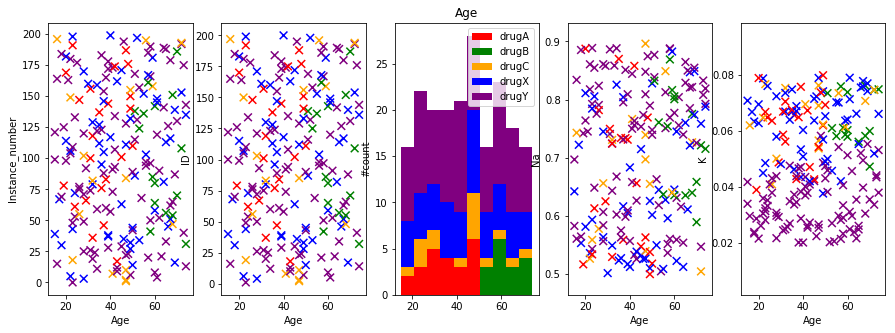

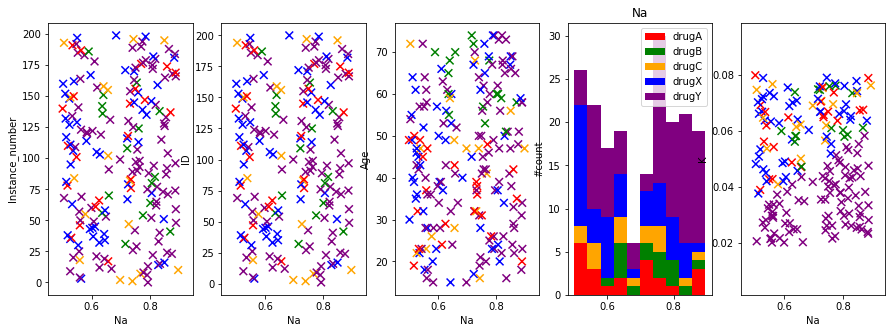

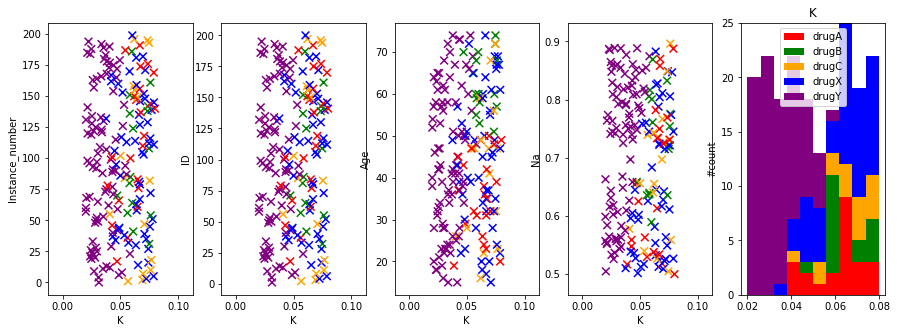

In [59]:
for i in range(n_numeric_attributes):
    k = 1
    plt.subplots(1,  n_numeric_attributes, figsize=(15, 5))

    for j in range(n_numeric_attributes):
        plt.subplot(1, n_numeric_attributes, k)

        if i == j:
            colored_hist(data, class_map, color_map, numeric_attributes[i], 'Drug', n_bins=10)
        else:
            colored_scatter(data, numeric_attributes[i], numeric_attributes[j], colors)

        k += 1

    plt.show()

### *# Focus on this scatter plot*

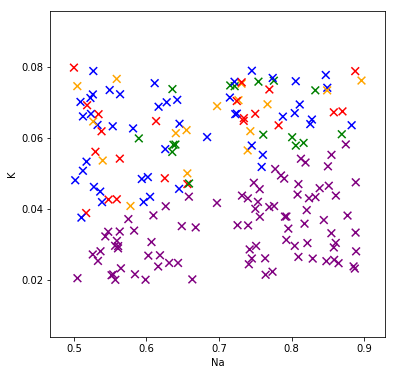

In [60]:
plt.figure(figsize=(6, 6))
colored_scatter(data, 'Na', 'K', colors)
plt.show()

### *# A hyperplane can separate the drugY (purple) class*

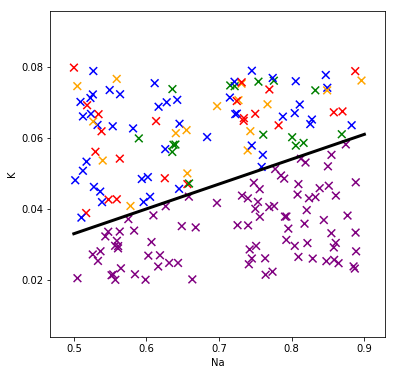

In [50]:
x = [0.5, 0.9]
y = [0.033, 0.061]

plt.figure(figsize=(6, 6))
colored_scatter(data, 'Na', 'K', colors)
plt.plot(x, y, linewidth=3, color='black')
plt.show()

Data preparation
--

### *# Remove all the attributes with too high (typically IDs) or too low variability (column that exhibit the same value for all the records)*

In [27]:
data = data[['Sex', 'BP', 'Cholesterol', 'Age', 'Na', 'K', 'Drug']]
attributes = list(data.columns)
n_attributes = len(attributes)
print(data.head())

  Sex      BP Cholesterol  Age        Na         K   Drug
0   F    HIGH        HIGH   23  0.792535  0.031258  drugY
1   M     LOW        HIGH   47  0.739309  0.056468  drugC
2   M     LOW        HIGH   47  0.697269  0.068944  drugC
3   F  NORMAL        HIGH   28  0.563682  0.072289  drugX
4   F     LOW        HIGH   61  0.559294  0.030998  drugY


### *# Highlight missing values*

In [28]:
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
Sex            200 non-null category
BP             200 non-null category
Cholesterol    200 non-null category
Age            200 non-null int64
Na             194 non-null float64
K              196 non-null float64
Drug           200 non-null category
dtypes: category(4), float64(2), int64(1)
memory usage: 6.0 KB
None

Sex            0
BP             0
Cholesterol    0
Age            0
Na             6
K              4
Drug           0
dtype: int64


### *# Embed the hyperplane of separation information*

#### *# Compute the hyperplane*

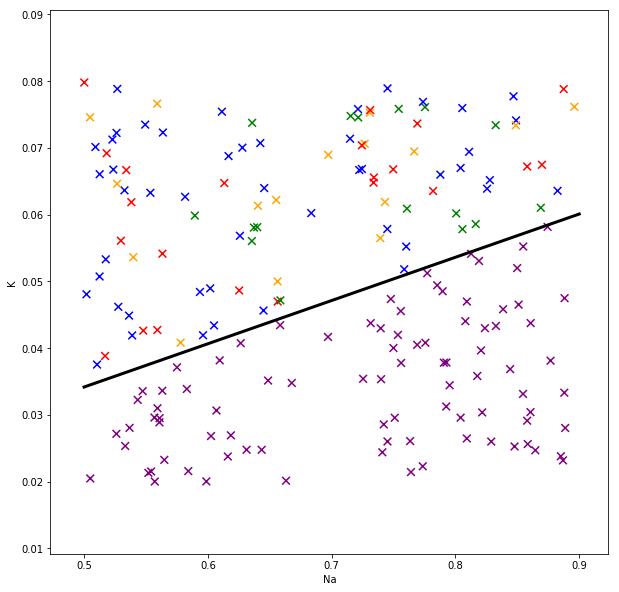

In [62]:
# Create model
svm_model = svm.SVC(kernel='linear', C=1000)

# Prepare data projection
x = data[['Na', 'K']].values
y = np.zeros(len(data)) - 1
y[data['Drug'] == 'drugY'] = 1

# Replace missing values
np.nan_to_num(x, copy=False)

# Train the model
svm_model.fit(x, y)

# get the separating hyperplane
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0.5, 0.9)
yy = a * xx - (svm_model.intercept_[0]) / w[1]

plt.figure(figsize=(10, 10))
colored_scatter(data, 'Na', 'K', colors)
plt.plot(xx, yy, linewidth=3, color='black')
plt.show()

#### *# Create a new attribute*

In [64]:
new_attr_val = np.array(['Under_threshold'] * len(data))
new_attr_val[data['K'] > a * data['Na'] - (svm_model.intercept_[0]) / w[1]] = 'Above_threshold'
new_attr_val[data['K'].isna() | data['Na'].isna()] = 'Unknown'
data['Hyper'] = new_attr_val
data['Hyper'] = data['Hyper'].astype('category')
print(data.head(10))
print()
print(data.info())

   Instance_number  ID  Age Sex      BP Cholesterol        Na         K  \
0                0   1   23   F    HIGH        HIGH  0.792535  0.031258   
1                1   2   47   M     LOW        HIGH  0.739309  0.056468   
2                2   3   47   M     LOW        HIGH  0.697269  0.068944   
3                3   4   28   F  NORMAL        HIGH  0.563682  0.072289   
4                4   5   61   F     LOW        HIGH  0.559294  0.030998   
5                5   6   22   F  NORMAL        HIGH       NaN  0.078647   
6                6   7   49   F  NORMAL        HIGH  0.789637  0.048518   
7                7   8   41   M     LOW        HIGH  0.766635  0.069461   
8                8   9   60   M  NORMAL        HIGH  0.777205  0.051230   
9                9  10   43   M     LOW      NORMAL  0.526102  0.027164   

    Drug            Hyper  
0  drugY  Under_threshold  
1  drugC  Above_threshold  
2  drugC  Above_threshold  
3  drugX  Above_threshold  
4  drugY  Under_threshold  
5  dru

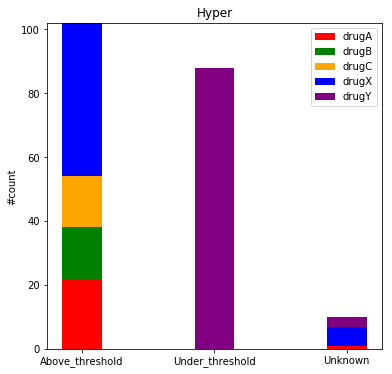

In [65]:
plt.figure(figsize=(6, 6))
colored_bar(data, class_map, color_map, 'Hyper', 'Drug')
plt.show()

Modeling
==

### *# Binarize the dataset*

In [67]:
data2 = pd.get_dummies(data, columns=["Sex", "BP", "Cholesterol", 'Hyper'])
new_attr_list = list(data2.columns)
new_attr_list.remove('Drug')
data2 = data2[new_attr_list]
print(data2.head(10))

   Instance_number  ID  Age        Na         K  Sex_F  Sex_M  BP_HIGH  \
0                0   1   23  0.792535  0.031258      1      0        1   
1                1   2   47  0.739309  0.056468      0      1        0   
2                2   3   47  0.697269  0.068944      0      1        0   
3                3   4   28  0.563682  0.072289      1      0        0   
4                4   5   61  0.559294  0.030998      1      0        0   
5                5   6   22       NaN  0.078647      1      0        0   
6                6   7   49  0.789637  0.048518      1      0        0   
7                7   8   41  0.766635  0.069461      0      1        0   
8                8   9   60  0.777205  0.051230      0      1        0   
9                9  10   43  0.526102  0.027164      0      1        0   

   BP_LOW  BP_NORMAL  Cholesterol_HIGH  Cholesterol_NORMAL  \
0       0          0                 1                   0   
1       1          0                 1                   0   

### *# Split-out validation dataset*

In [68]:
X = np.array(data2.values)

# Replace missing values
X[np.isnan(X)] = 0

Y = np.array(data['Drug'].values)
validation_size = 0.20
seed = 121

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

### *# Create the models*

In [69]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', min_samples_leaf=3)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C45: 0.950000 (0.061237)
CART: 0.956250 (0.062812)


Evaluation
==

### *# Model comparison*

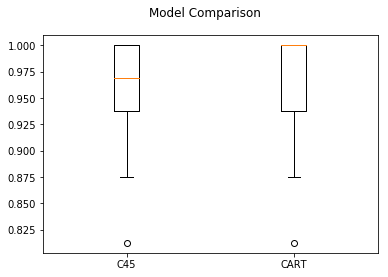

In [70]:
fig = plt.figure()
fig.suptitle('Model Comparison')
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names)
plt.show()

### *# Do predictions on test set*

In [71]:
model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=3)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('Accuracy:', accuracy_score(Y_validation, predictions))
print()
print()
print('Confusion matrix:')
print(confusion_matrix(Y_validation, predictions))
print()
print()
print('Classification report')
print(classification_report(Y_validation, predictions))

Accuracy: 1.0


Confusion matrix:
[[ 3  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 18]]


Classification report
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        18

   micro avg       1.00      1.00      1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

